<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machin_learning_ch15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층 합성곱 신경망

### 심층 합성곱 CNN은 일반 NN과 비교하여보면

NN의 경우 입력층 1개와 은닉층 여러개 출력층 여러개로 구성되어있으며, 출력층에서 도출된 손실함수를 바탕으로 업데이트하는 방식이다.

CNN은 은닉층 대신 여러개의 컨볼루션층 이후 완전연결층으로 구성되어있다. 출력층으로부터 도출된 손실함수를 옵티마이저를 이용하여 최소화하는 것은 NN과 동일하다.

#### 컨볼루션층은 conv, relu, pooling으로 구성되어 있다.

conv는 컨볼루션 연산을 수행하는 부분이다. 입력데이터의 특징을 추출하는 역할을 함.

pooling은 입력정보는 특징적인 값으로 압축하여 연산량을 줄여줌 (최소 최대 평균 등등)



## 컨볼루션 연산
컨볼루션 연산은 입력데이터를 필터로 이용하여 연산하는 것인데 여기서 필터는 가중치의 집합체이다.

계산과정은 필터를 일정간격(스트라이드)으로 이동해가며 입력데이터와의 곱을 더해주어 새로운 데이터를 만드는 것이다.

그 후 conv내의 바이어스를 더해주어 특징맵이라는 데이터를 생성한다.

###layers.Conv2D(input, filter, strides, padding...)

input = [batch, in_height, in_width, in_channels]

filter = [filter_height, filter_width, in_channels, out_channels]

strides = [1,1,1,1] (ex)

padding = 'same' or 'valid'

## relu 연산
음수는 모두 0 양수는 모두 그대로 배출하는 함수

## pooling 연산
pooling에선 max pooling이 가장 많이 쓰임

최종 pooling연산에서 크기를 정하는 것은 공식을 통해 정하게 됨.

### layers.MaxPool2D(value, ksize, strides, padding...)
value = [batch, height, width, channels]

ksize = [1, height, width, 1]

strides = [1, 2, 2, 1] (ex)

padding = 'same' (conv와는 다른의미의 padding)

# 패딩
컨볼루션 연산을 수행하기 전에 입력데이터 주변을 0으로 채움

>데이터가 축소되는 것을 방지하기 위함

( ex)4 x 4 데이터를 6 x 6으로 0으로 감싸줌 )

## 결과
컨볼루션 연산은 결국 데이터의 특징을 추출하는 것인데, 풀링해서 나온 최종 결과로 부터, 값이 클수록 해당 필터의 성분이 많이 들어있다는 것을 파악할 수 있다.

# 완전연결층 
완전연결층은 마지막 컨볼루션 층으로부터 도출된 결과를 flatten(평탄화)을 해주는 것인데 1차원벡터로 바꾸는 작업을 시행한다.

# 출력층
출력층은 입력받은 값을
선형회귀 한 뒤 0~1 사이로 정규화 하여 출력하고 이들의 총합은 항상 1이 되도록한다.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

TensorFlow is already loaded. Please restart the runtime to change versions.


'1.15.0'

In [0]:
# google drive와 연동
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# 연동 테스트 코드
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')

!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

In [0]:
# ch13의 load_mnist함수를 사용하여 데이터 로드
# MNIST dataset을 불러오는 함수 생성
import struct
import numpy as np

def load_mnist(path, kind = 'train'):
  labels_path = path + '/%s-labels.idx1-ubyte' % kind
  images_path = path + '/%s-images.idx3-ubyte' % kind
  print(labels_path, images_path)

  with open(labels_path, 'rb') as lbpath:
    magic, n = struct.unpack('>II', lbpath.read(8))
    labels = np.fromfile(lbpath, dtype = np.uint8)
        
  with open(images_path, 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
    images = np.fromfile(imgpath,
                             dtype = np.uint8).reshape(len(labels), 784)
    # 정규화
    images = ((images / 255.) - .5) * 2
        
  return images, labels

In [0]:
X_data, y_data = load_mnist('/content/gdrive/My Drive/machine_learning/ch12', kind = 'train')
print('행: %d, 열: %d' % (X_train.shape[0], X_train.shape[1]))
X_test, y_test = load_mnist('/content/gdrive/My Drive/machine_learning/ch12', kind = 't10k')
print('행: %d, 열: %d' % (X_test.shape[0], X_test.shape[1]))

/content/gdrive/My Drive/machine_learning/ch12/train-labels.idx1-ubyte /content/gdrive/My Drive/machine_learning/ch12/train-images.idx3-ubyte
행: 50000, 열: 784
/content/gdrive/My Drive/machine_learning/ch12/t10k-labels.idx1-ubyte /content/gdrive/My Drive/machine_learning/ch12/t10k-images.idx3-ubyte
행: 10000, 열: 784


In [0]:
# 데이터 분할
X_train, y_train = X_data[:50000, :], y_data[:50000]
X_valid, y_valid = X_data[50000:, :], y_data[50000:]

In [0]:
print('훈련 세트:', X_train.shape, y_train.shape)
print('검증 세트:', X_valid.shape, y_valid.shape)
print('테스트 세스:', X_test.shape, y_test.shape)

훈련 세트: (50000, 784) (50000,)
검증 세트: (10000, 784) (10000,)
테스트 세스: (10000, 784) (10000,)


In [0]:
# 정규화
mean_vals = np.mean(X_train, axis = 0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals) / std_val
X_valid_centered = (X_valid - mean_vals) / std_val
X_test_centered = (X_test - mean_vals) / std_val

In [0]:
# 적용하기 위해서 차원을 변경
X_train_centered = X_train_centered.reshape((-1, 28, 28, 1))
X_valid_centered = X_valid_centered.reshape((-1, 28, 28, 1))
X_test_centered = X_test_centered.reshape((-1, 28, 28, 1))

In [0]:
# 원 핫 인코딩 (to_categorical함수 이용)
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_valid_onehot = to_categorical(y_valid)
y_test_onehot = to_categorical(y_test)

In [0]:
# 확인
print(y_train[0])
print(y_train_onehot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# 모델 구성
from tensorflow.keras import layers, models

model = models.Sequential()

# conv 
# layers.Conv2D(filters, kernel_size, padding, activation, input_shape)
## relu function은 이미지 분야에서 activation으로 핫한 함수임
model.add(layers.Conv2D(32, (5,5), padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))

# 출력크기 계산 공식

o = ((n + 2p -m) / s) + 1

In [0]:
# pooling
# MaxPool2D(size)
model.add(layers.MaxPool2D((2,2)))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 두번째 합성곱 층
model.add(layers.Conv2D(64, (5, 5), padding = 'valid', activation = 'relu'))

# 두번째 풀링층
model.add(layers.MaxPooling2D((2,2)))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 완전연결층 (전처리)
model.add(layers.Flatten())

# 완전연결층(Dense)
model.add(layers.Dense(1024, activation = 'relu'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
Total params: 1,101,696
Trainable params: 1,101,696
Non-trainable params: 0
____________________________________________

In [0]:
# dropout
# layers.Dropout(rate)
model.add(layers.Dropout(0.5))

In [0]:
# 완전연결층
# layers.Dense(units, activation)
model.add(layers.Dense(10, activation = 'softmax'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)             

In [0]:
# 합성곱 신경망 모델 훈련
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [0]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

callback_list = [ModelCheckpoint(filepath = 'cnn_checkpoint.h5', monitor = 'val_loss', save_best_only = True),
                 TensorBoard(log_dir = 'logs / {}'.format(time.asctime()))]


In [0]:
history = model.fit(X_train_centered, y_train_onehot, batch_size = 64, epochs = 20,
                    validation_data = (X_valid_centered, y_valid_onehot), callbacks = callback_list)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 67s 1ms/sample - loss: 0.1342 - acc: 0.9579 - val_loss: 0.0478 - val_acc: 0.9858
Epoch 2/20
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.0506 - acc: 0.9847 - val_loss: 0.0438 - val_acc: 0.9862
Epoch 3/20
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.0359 - acc: 0.9886 - val_loss: 0.0383 - val_acc: 0.9892
Epoch 4/20
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.0278 - acc: 0.9915 - val_loss: 0.0409 - val_acc: 0.9891
Epoch 5/20
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.0226 - acc: 0.9926 - val_loss: 0.0398 - val_acc: 0.9900
Epoch 6/20
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.0174 - acc: 0.9944 - val_loss: 0.0464 - val_acc: 0.9896
Epoch 7/20
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.0177 - acc: 0.9942 - val_loss: 0.

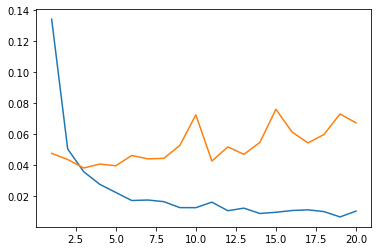

In [0]:
# 손실 시각화
import matplotlib.pyplot as plt

epochs = np.arange(1, 21)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.show()

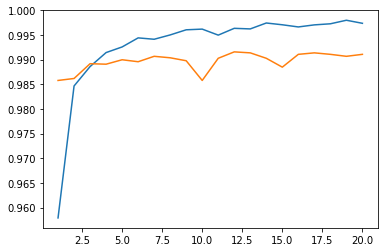

In [0]:
# 정확도 시각화
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.show()

In [0]:
# 텐서보드 실행
$ tensorboard --logdir logs/

SyntaxError: ignored

In [0]:
# 모델 저장
model.save('cnn_model.h5')

In [0]:
# 복원
from tensorflow.keras.models import load_model

restored_model = load_model('cnn_model.h5')
resotred_model.load_weights('cnn_checkpoint.h5')

NameError: ignored

In [0]:
# 테스트 세트에서의 평가
resotred_model.evaluate(X_test_centered, y_test_onehot)

In [0]:
# 테스트 정확도 확인
print(np.argmax(resotred_model.predict(X_test_centered[:10], axis = 1)))
print(y_test[:10])

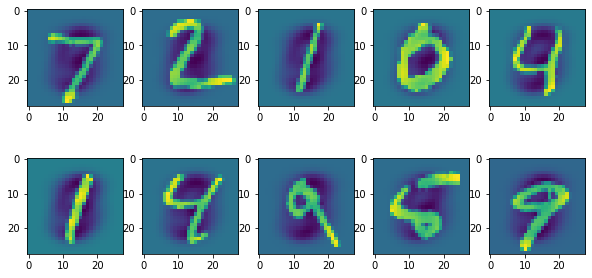

In [0]:
# 이미지 플로팅
fig = plt.figure(figsize = (10, 5))

for i in range(10):
  fig.add_subplot(2, 5, i+1)
  plt.imshow(X_test_centered[i].reshape(28, 28))

# 활성화 출력과 필터 시각화

In [0]:
first_layer = model.layers[0]

first_activation = models.Model(inputs = model.input, outputs = first_layer.output)

activation = first_activation.predict(X_test_centered[:10])

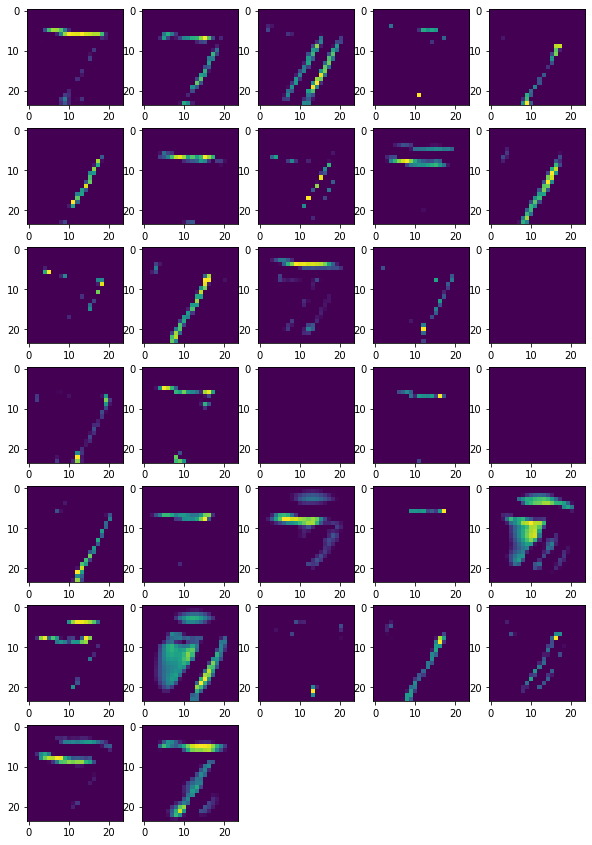

In [0]:
fig = plt.figure(figsize = (10, 15))

for i in range(32):
  fig.add_subplot(7, 5, i+1)
  plt.imshow(activation[0, :, :, i])

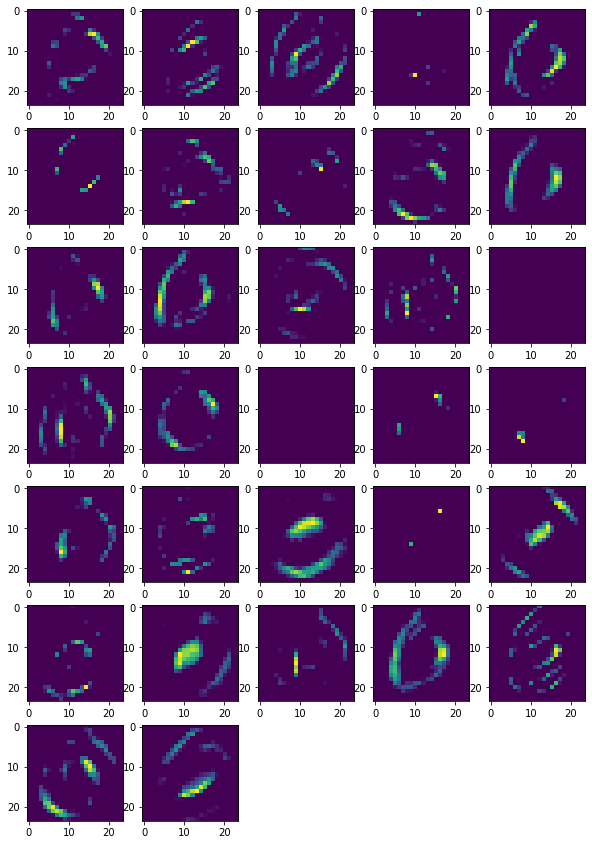

In [0]:
fig = plt.figure(figsize = (10, 15))

for i in range(32):
  fig.add_subplot(7, 5, i+1)
  plt.imshow(activation[3, :, :, i])
  